# Mission to Mars

## Step 1 - Scraping

In [84]:
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import pandas as pd

## NASA Mars News

In [85]:
executable_path = {'executable_path': './chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

news_url = "https://mars.nasa.gov/news/?page=0&per_page=40&order=publish_date+desc%2Ccreated_at+desc&search=&category=19%2C165%2C184%2C204&blank_scope=Latest"
browser.visit(news_url)

<!DOCTYPE html>
<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="//m.addthis.com/live/red_lojson/300lo.json?si=5c72f67dce8e6b22&amp;bkl=0&amp;bl=1&amp;pdt=3755&amp;sid=5c72f67dce8e6b22&amp;pub=ra-5a690e4c1320e328&amp;rev=v8.3.39-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=mars.nasa.gov&amp;fp=news%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;mk=Mars%2Cmissions%2CNASA%2Crover%2CCuriosity%2COpportunity%2CInSight%2CMars%20Reconnaissance%20Orbit
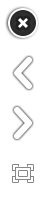
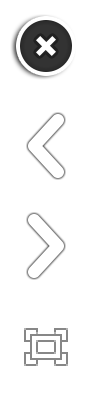
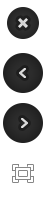
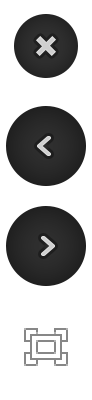
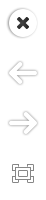
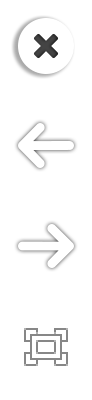
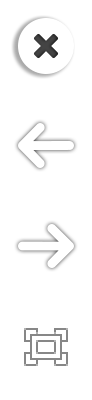

In [86]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

In [87]:
news_title = soup.find("li", class_="slide").find("div", class_="content_title").text
print(news_title)
news_p = soup.find("li", class_="slide").find("div", class_="article_teaser_body").text
print(news_p)

After a Reset, Curiosity Is Operating Normally
NASA's Mars rover Curiosity is in good health but takes a short break while engineers diagnose why it reset its computer. 


## JPL Mars Space Images - Featured Image

In [88]:
jpl_url = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"
browser.visit(jpl_url)

In [89]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 9]> <html class="no-js ie ie9" lang="en"> <![endif]-->
<!--[if IE 8]> <html class="no-js ie ie8" lang="en"> <![endif]-->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface no-generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-" style="" xmlns="http://www.w3.org/1999/xhtml">
 <!-- START HEADER: "DEFAULT" -->
 <head>
  <script src="//m.addthis.com/live/red_lojson/300lo.json?si=5c72f69199738135&amp;bkl=0&amp;bl=1&amp;pdt=7100&amp;sid=5c72f69199738135&amp;pub=&amp;rev=v8.3.39-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2F%3Fsearch%3D%26category%3DMars&amp;fr=&a

In [90]:
featured_img_base = "https://www.jpl.nasa.gov"
featured_img_url_raw = soup.find("div", class_="carousel_items").find("article")["style"]
featured_img_url_raw
featured_img_url = featured_img_url_raw.split("'")[1]
featured_img_url = featured_img_base + featured_img_url
featured_img_url

'https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA17046-1920x1200.jpg'

### Mars Weather

In [92]:
# https://twitter.com/marswxreport?lang=en
weather_twitter_url = "https://twitter.com/marswxreport?lang=en"
browser.visit(weather_twitter_url)

In [93]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html data-scribe-reduced-action-queue="true" lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <script async="" src="//www.google-analytics.com/analytics.js">
  </script>
  <script nonce="">
   !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")&gt;-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
  </script>
  <script id="bouncer_terminate_iframe" nonce="">
   if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="ttft_boot_data" nonce="">
   window.ttftData={"transaction_id":"001d3812008f2fb7.d695a793e5f11f51\u003c:0077f4eb00a4fb12","server_request_start_time":1551038373302,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_b\/1.0.1\/20190206.2140.12b8a68","ttft_browser":"chrome"};!function(){fu

In [94]:
tweets = soup.find("div", class_="stream").find("ol").find_all("li", class_="js-stream-item")
for tweet in tweets:
    tweet_text = tweet.find("div", class_="js-tweet-text-container").text
    if "Sol " in tweet_text:
        mars_weather = tweet_text.strip()
        break

mars_weather

'Sol 2319 (2019-02-13), high -17C/1F, low -72C/-97F, pressure at 8.12 hPa, daylight 06:46-18:52pic.twitter.com/anlHR95BMs'

### Mars Facts

In [95]:
# https://space-facts.com/mars/
mars_fact_url = "https://space-facts.com/mars/"
browser.visit(mars_fact_url)

In [96]:
mars_fact_url = "https://space-facts.com/mars/"
mars_fact_table = pd.read_html(mars_fact_url)
mars_fact_table

mars_fact_df = mars_fact_table[0]
mars_fact_df.columns = ["Fact","Value"]

mars_fact_df["Fact"] = mars_fact_df["Fact"].str[:-1]
mars_fact_df = mars_fact_df.set_index("Fact")
mars_fact_df

,Value
Fact,
Equatorial Diameter,"6,792 km"
Polar Diameter,"6,752 km"
Mass,6.42 x 10^23 kg (10.7% Earth)
Moons,2 (Phobos & Deimos)
Orbit Distance,"227,943,824 km (1.52 AU)"
Orbit Period,687 days (1.9 years)
Surface Temperature,-153 to 20 °C
First Record,2nd millennium BC
Recorded By,Egyptian astronomers


In [97]:
mars_fact_html = mars_fact_df.to_html()
#mars_fact_html = mars_fact_html.replace('\n', '')
mars_fact_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Value</th>\n    </tr>\n    <tr>\n      <th>Fact</th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Equatorial Diameter</th>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>Polar Diameter</th>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>Mass</th>\n      <td>6.42 x 10^23 kg (10.7% Earth)</td>\n    </tr>\n    <tr>\n      <th>Moons</th>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>Orbit Distance</th>\n      <td>227,943,824 km (1.52 AU)</td>\n    </tr>\n    <tr>\n      <th>Orbit Period</th>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>Surface Temperature</th>\n      <td>-153 to 20 °C</td>\n    </tr>\n    <tr>\n      <th>First Record</th>\n      <td>2nd millennium BC</td>\n    </tr>\n    <tr>\n      <th>Recorded By</th>\n      <td>Egyptian astronomers</td>\n    </tr>\n  </tbody>\n</

### Mars Hemispheres

In [98]:
#executable_path = {'executable_path': './chromedriver'}
#browser = Browser('chrome', **executable_path, headless=False)

# https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars
hemisphere_url = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"
browser.visit(hemisphere_url)

<!DOCTYPE html>
<html dir="ltr" i18n-processed="" lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>
<meta charset="utf-8"/>
<meta content="#fff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0,
                                 maximum-scale=1.0, user-scalable=no" name="viewport"/>
<title>astrogeology.usgs.gov</title>
<style>/* Copyright 2017 The Chromium Authors. All rights reserved.
 * Use of this source code is governed by a BSD-style license that can be
 * found in the LICENSE file. */

a {
  color: rgb(88, 88, 88);
}

body {
  --google-blue-600: rgb(26, 115, 232);
  --google-blue-700: rgb(25, 103, 210);
  --google-gray-50: rgb(248, 249, 250);
  --google-gray-300: rgb(218, 220, 224);
  --google-gray-500: rgb(154, 160, 166);
  --google-gray-600: rgb(128, 134, 139);
  --google-gray-700: rgb(95, 99, 104);
  background-color: #fff;
  color: var(--google-gray-700);
  word-wrap: break-word;
}

.nav-wrapper .secondary-button {
  background: #fff;
  border: 1px
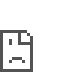
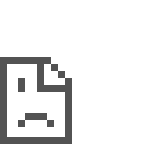
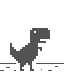
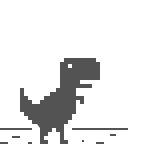
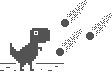
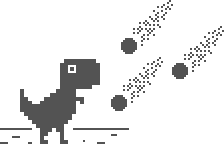
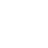
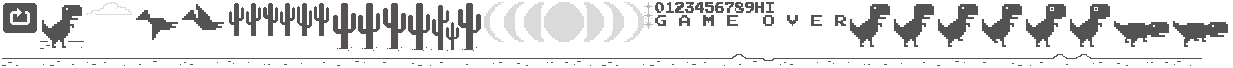
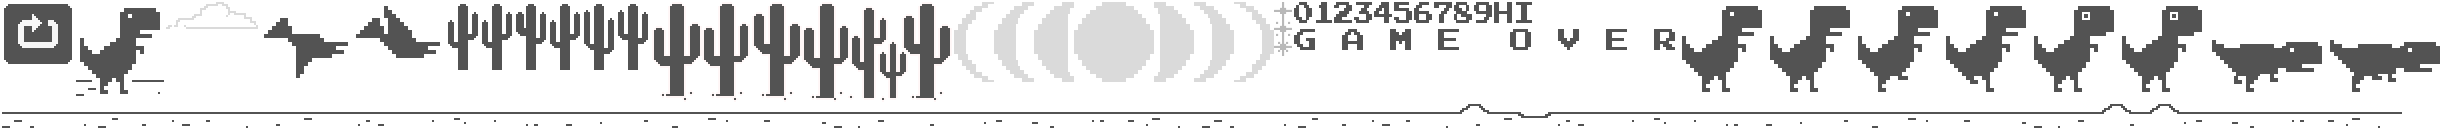

In [99]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
soup

In [100]:
hemisphere_image_urls = []

links = soup.find_all("div", class_="item")
print(links)

[]


In [101]:
##html = browser.html
##soup = BeautifulSoup(html, 'html.parser')
    
hemisphere_image_urls = []

links = soup.find_all("div", class_="item")
print(links)

for link in links:
    img_dict = {}
    title = link.find("h3").text
    next_link = link.find("div", class_="description").a["href"]
    full_next_link = "https://astrogeology.usgs.gov" + next_link
    
    browser.visit(full_next_link)
    
    pic_html = browser.html
    pic_soup = BeautifulSoup(pic_html, 'html.parser')
    
    url = pic_soup.find("img", class_="wide-image")["src"]

    img_dict["title"] = title
    img_dict["img_url"] = "https://astrogeology.usgs.gov" + url
    print(img_dict["img_url"])
    
    hemisphere_image_urls.append(img_dict)

print(hemisphere_image_urls)

[]
[]


In [102]:
hemisphere_image_urls

[]